<a href="https://colab.research.google.com/github/madisonwilliams1/bme3053c/blob/main/lessons-solved/11_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Convolutional Neural Networks</h1>

---

<center><h2>Lesson: 11</h2></center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/lessons/11_Convolutional_Neural_Networks.ipynb)


## Overview

Convolutional Neural Networks (CNNs) are a specialized type of deep learning model that excels in processing data with grid-like structures, such as images. Originally developed for image recognition, CNNs are now widely used in applications like video analysis, natural language processing, and biomedical imaging. This introduction will guide you through the core concepts of CNNs, including their architecture, the convolution operation, pooling layers, and the training process, with in-depth explanations and practical examples.


## When to Use CNNs vs Other Neural Networks

CNNs are particularly powerful when working with image data or spatial data where local features are essential. Compared to fully connected neural networks, which treat all inputs as equally important, CNNs leverage spatial hierarchies in data, making them more efficient and effective for tasks like image classification, object detection, and medical imaging.

For example, a CNN is ideal for recognizing handwritten digits in the MNIST dataset, where spatial features such as curves and edges are critical. On the other hand, a fully connected neural network might be more suitable for predicting housing prices based on numerical input features like square footage or number of bedrooms, as these inputs do not have a spatial relationship. Fully connected neural networks work well for simple tasks with non-image data, while CNNs shine in scenarios that require detecting patterns across different spatial locations.


## When to Use CNNs in Biomedical Applications

CNNs are ideal for tasks such as medical image analysis, where detecting tumors, analyzing radiographic images, or identifying anatomical structures requires recognizing spatial features across images.


## Pros and Cons of Convolutional Neural Networks

### Pros

- **Automatic Feature Extraction**: CNNs can learn relevant features directly from images without requiring manual feature engineering.
- **Translation Invariance**: They are robust to changes in position within images, making them ideal for classification tasks where objects may appear in various locations.
- **Efficient Parameter Sharing**: Convolutional layers use shared weights, reducing the number of parameters compared to fully connected layers.

### Cons

- **High Computational Cost**: CNNs often require significant computational resources and memory, especially for large models.
- **Data Requirements**: They perform best with large datasets. Training a CNN on a small dataset might lead to overfitting without proper regularization techniques, such as dropout or L2 regularization. Alternatively, transfer learning can be employed, where a pre-trained model is fine-tuned on a smaller dataset to achieve better performance.
- **Interpretability**: Understanding what specific features are being learned can be challenging, making them less interpretable compared to simpler models.


## Convolution

Convolution is a fundamental operation in CNNs, especially when dealing with image data. In this context, convolution involves sliding a small filter (kernel) over the input image to produce a feature map that highlights specific patterns, such as edges or textures.

Imagine the filter as a small window that moves across the image, focusing on a few pixels at a time. Each time the filter moves, it calculates a weighted sum of the pixel values under it. This process allows the CNN to learn important features, like edges and corners, which are then used for further analysis in deeper layers.

<center><img  src="https://github.com/uf-bme/bme3053c/raw/main/files/conv-slide.gif"/></center>



## Filter Size, Padding, and Stride

### Filter Size
The filter (or kernel) size determines how many pixels the convolution operation considers at once. Common filter sizes are 3x3, 5x5, and 7x7. Larger filters can capture more context but require more computation and parameters:
- Small filters (3x3): Good for detecting fine details and edges
- Large filters (5x5, 7x7): Better for capturing broader patterns

### Padding
Padding adds extra pixels around the input image before convolution. This helps:
- Preserve the spatial dimensions of the input
- Avoid information loss at the edges
- Control the size of the output feature maps


### Stride
Stride controls how many pixels the filter moves at each step:
- Stride 1: Filter moves one pixel at a time
- Stride 2: Filter moves two pixels at a time

Larger strides reduce the spatial dimensions of the output feature map, similar to pooling layers, but may lose information in the process.

[Examples of padding and strides](https://hannibunny.github.io/mlbook/neuralnetworks/convolutionDemos.html)



## Pooling Layers

Pooling is used to reduce the dimensions of feature maps, decreasing computational complexity and preventing overfitting. The most common type is Max Pooling, which takes the maximum value from a patch of the feature map. Pooling layers make the representation more manageable while retaining important features.

- **Max Pooling**: Takes the highest value in each patch.
- **Average Pooling**: Takes the average value.

- Pooling helps achieve translational invariance by taking the maximum (or average) value within each patch.
  - For example, if a feature like an edge moves slightly within a pooling window, the max pooling operation
will still detect it and output the same value, making the network less sensitive to small spatial shifts
in the input image.

<br/>

<center><img  src="https://github.com/uf-bme/bme3053c/raw/main/files/maxpool.gif"/></center>


In [1]:
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import DataLoader, random_split
    from torchvision import transforms
    import torch.utils.data as data
    from tqdm import tqdm
except ImportError:
    %pip install torch torchvision torchaudio
    %pip install tqdm
    import torch.utils.data as data
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import DataLoader, random_split
    from torchvision import transforms
    from tqdm import tqdm


https://github.com/tensorflow/lucid?tab=readme-ov-file#recomended-reading


## MedMNIST
MedMNIST (https://medmnist.com/) is a collection of 12 pre-processed medical image datasets that follow the same format as the classic MNIST dataset. Each dataset represents a specific medical imaging task, such as organ classification, disease detection, or tissue identification. The datasets are standardized to be lightweight, making them ideal for rapid prototyping and educational purposes.

Key features of MedMNIST:
- All images are pre-processed to 28x28 pixels
- Includes both 2D and 3D medical imaging data
- Covers various medical domains (pathology, radiology, etc.)
- Suitable for both binary and multi-class classification tasks
- Comes with standardized evaluation metrics




## PathMNIST Dataset

The PathMNIST dataset is a part of the MedMNIST collection, which is a set of standardized biomedical image datasets for machine learning.

PathMNIST contains images of histopathologic scans of colorectal cancer. The dataset is divided into three splits: training, validation, and testing. Each image is a 3-channel RGB image with a size of 28x28 pixels. The dataset includes 9 different classes:

0. **adipose**  
   - Refers to fat tissue, often found surrounding organs and structures in the body.

1. **background**  
   - The background of the image, which does not contain any relevant tissue or structures.

2. **debris**  
   - Refers to cellular or tissue remnants that may appear as non-specific or irrelevant material in the sample.

3. **lymphocytes**  
   - A type of white blood cell involved in immune responses. In histopathology, their presence can be indicative of inflammation or immune response.

4. **mucus**  
   - The gel-like substance that coats various tissues, such as the digestive tract, serving as a protective layer.

5. **smooth muscle**  
   - Muscle tissue that is not under voluntary control, found in organs like the intestines, where it helps in movement and digestion.

6. **normal colon mucosa**  
   - The normal tissue lining of the colon, responsible for absorbing nutrients and protecting the colon wall.

7. **cancer-associated stroma**  
   - The connective tissue surrounding cancer cells. In cancer, the stroma may undergo changes that support tumor growth and spread.

8. **colorectal adenocarcinoma epithelium**  
   - Cancerous epithelial tissue found in colorectal adenocarcinoma. This is a type of cancer originating in the glands of the colon or rectum.

## Loading the Dataset

To demonstrate the capabilities of CNNs, we will work with the PathMNIST dataset, which contains histopathologic images of colorectal cancer tissue. This dataset is part of the MedMNIST collection and includes 9 different tissue classes. We will apply two key transformations to prepare the data:

1. ToTensor() - Converts the PIL Image to a PyTorch tensor and scales pixel values from [0, 255] to [0, 1]
2. Normalize() - Normalizes the tensor with mean 0.5 and standard deviation 0.5, resulting in values between -1 and 1

These transformations help standardize the input data and improve model training. The images are already in the correct format of 3x28x28 RGB images.


In [4]:
try:
    import medmnist
    from medmnist import INFO, Evaluator

except ImportError:
    %pip install medmnist
    import medmnist
    from medmnist import INFO, Evaluator



  Using cached medmnist-3.0.2-py3-none-any.whl.metadata (14 kB)
  Using cached fire-0.7.0-py3-none-any.whl
Using cached medmnist-3.0.2-py3-none-any.whl (25 kB)


In [5]:
data_flag = 'pathmnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [8]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
download = True
# load the data

train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


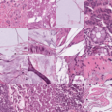

In [9]:
train_dataset.montage(length=4)

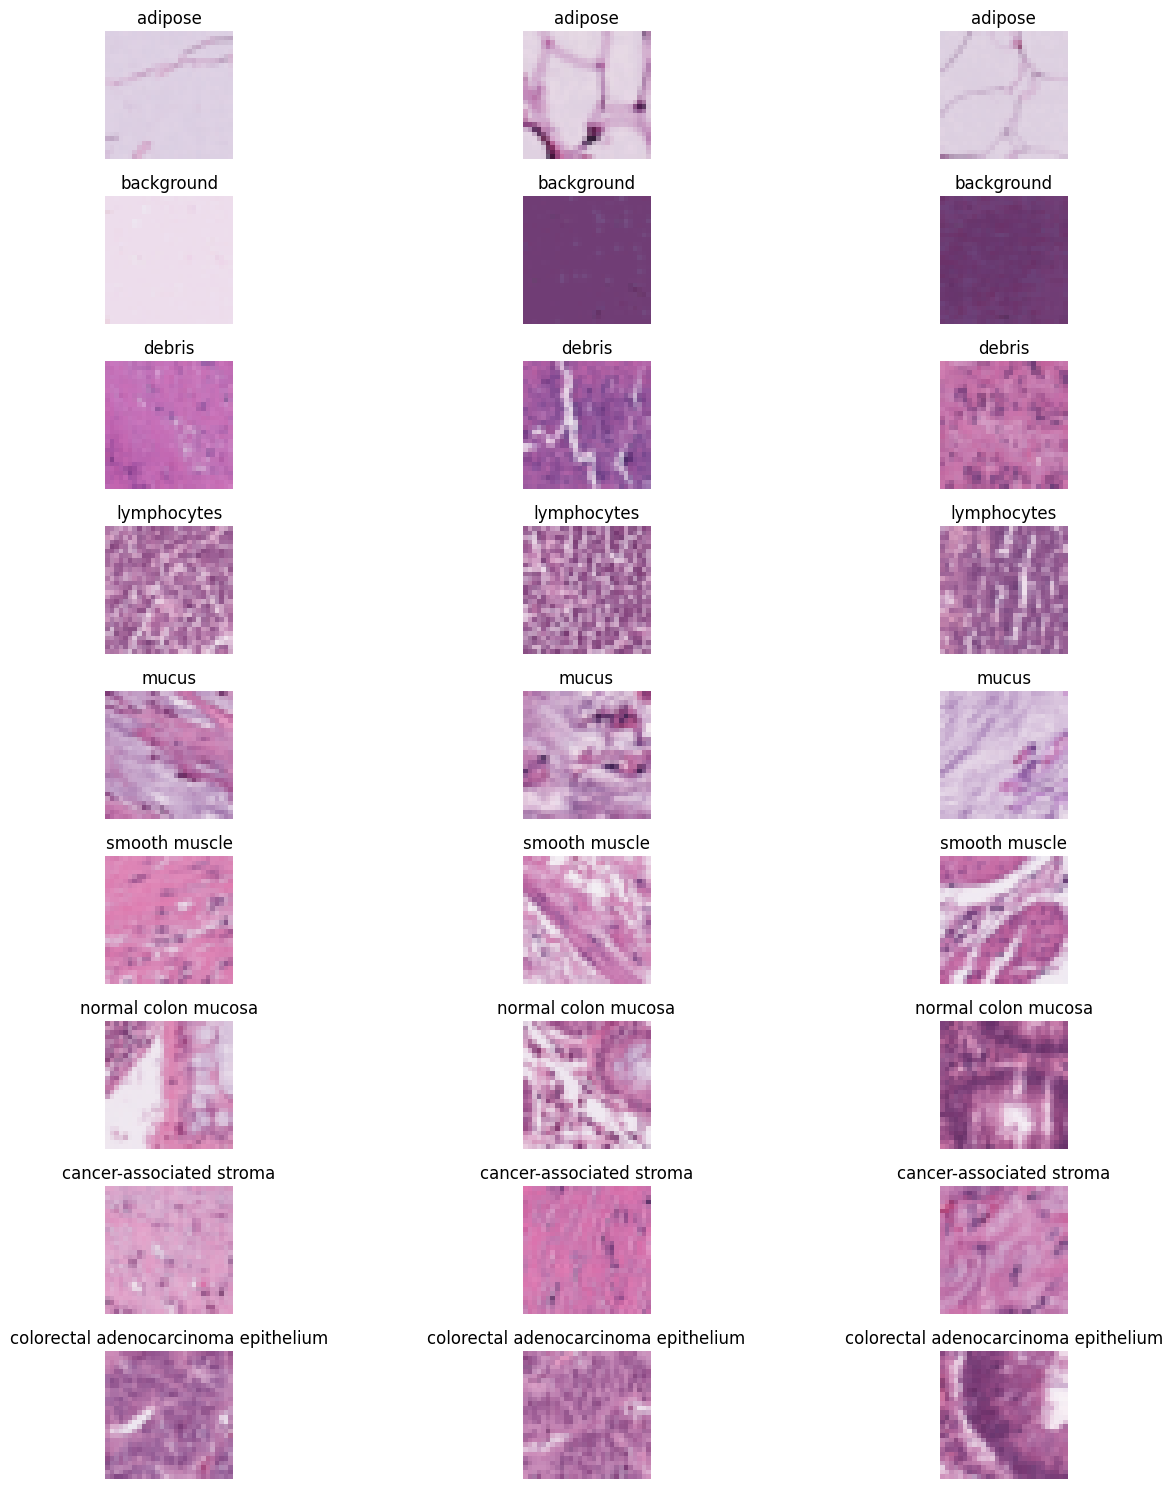

In [10]:
# Get 3 examples from each class
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))
classes =train_dataset.info['label']
for class_idx in range(9):
    # Get indices for this class
    indices = np.where(train_dataset.labels == class_idx)[0][:3]

    for i, idx in enumerate(indices):
        plt.subplot(9, 3, class_idx * 3 + i + 1)
        plt.imshow(train_dataset.imgs[idx].squeeze(), cmap='gray')
        plt.title(f'{classes[str(class_idx)]}')
        plt.axis('off')

plt.tight_layout()
plt.show()

Creating a Custom CNN Model

We'll create a custom Convolutional Neural Network (CNN) model for classifying the PathMNIST dataset.

Input:
- RGB images of size 28x28x3 pixels
- Images are normalized to [-1, 1] range using transforms.Normalize((0.5,), (0.5,))
- Batch size of 64 images

Our CNN architecture consists of:

1. Input Layer: Takes RGB images (3 channels)
2. Multiple Convolutional Blocks:
   - Conv2D layers with increasing filters (16->64)
   - Batch Normalization for training stability
   - ReLU activation
   - MaxPooling to reduce spatial dimensions
3. Fully Connected Layers:
   - Flattens convolutional features
   - Three dense layers (128->128->9 classes)
   - ReLU activation between dense layers

The model uses standard practices like batch normalization and max pooling to improve training and reduce overfitting. The architecture gradually increases the number of filters while reducing spatial dimensions, allowing it to learn hierarchical features.


In [11]:
# define a simple CNN model

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3), #16=number of filters which corresponds to number of feature maps output, in_channels is the number of channels
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = Net(in_channels=n_channels, num_classes=n_classes)

# define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

## Loss Functions

Loss functions measure how well a model is performing by calculating the difference between predicted outputs and actual target values. They provide a single number that the model tries to minimize during training.

Common loss functions in PyTorch include:

BCEWithLogitsLoss (Binary Cross Entropy with Logits Loss):
- Measures error for binary classification (0 or 1 outputs)
- Handles multiple independent binary predictions per sample
- Internally applies sigmoid to convert raw model outputs to probabilities
- More stable than separate sigmoid + BCE
- Examples: Detecting multiple objects in an image, multi-disease diagnosis

CrossEntropyLoss:
- Measures error for multi-class classification (picking 1 class from many)
- Internally applies softmax to get class probabilities that sum to 1
- Good for problems where each input belongs to exactly one class
- Examples: Classifying images into categories, digit recognition

The choice of loss function depends on your task:
- Use BCEWithLogitsLoss when samples can belong to multiple classes
- Use CrossEntropyLoss when samples belong to exactly one class

Our code uses BCEWithLogitsLoss for multi-label tasks and CrossEntropyLoss for standard classification.

For more details: https://pytorch.org/docs/stable/nn.html#loss-functions


## Training the CNN



In [ ]:
# train

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    model.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(inputs)

        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

## Evaluation

In [13]:
# evaluation

def test(split):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])

    data_loader = train_loader_at_eval if split == 'train' else test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()

        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)

        print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))


print('==> Evaluating ...')
test('train')
test('test')

==> Evaluating ...


KeyboardInterrupt: 

Area Under the ROC Curve (AUC)

AUC measures the model's ability to distinguish between classes by plotting the True Positive Rate (TPR)
against the False Positive Rate (FPR) at various classification thresholds.

TPR = TP / (TP + FN)  True Positive Rate (Sensitivity)
FPR = FP / (FP + TN)  False Positive Rate (1 - Specificity)

Where:
TP = True Positives
TN = True Negatives
FP = False Positives
FN = False Negatives

AUC = ∫ TPR d(FPR)  Area under the ROC curve

An AUC of:
- 1.0: Perfect classification
- 0.5: Random chance
- <0.5: Worse than random





## Visualizing Feature Maps

One of the ways to understand how CNNs work is to visualize feature maps, which show the output of convolutional layers for a given input image. This helps provide insight into the kind of features being learned at different stages of the network.


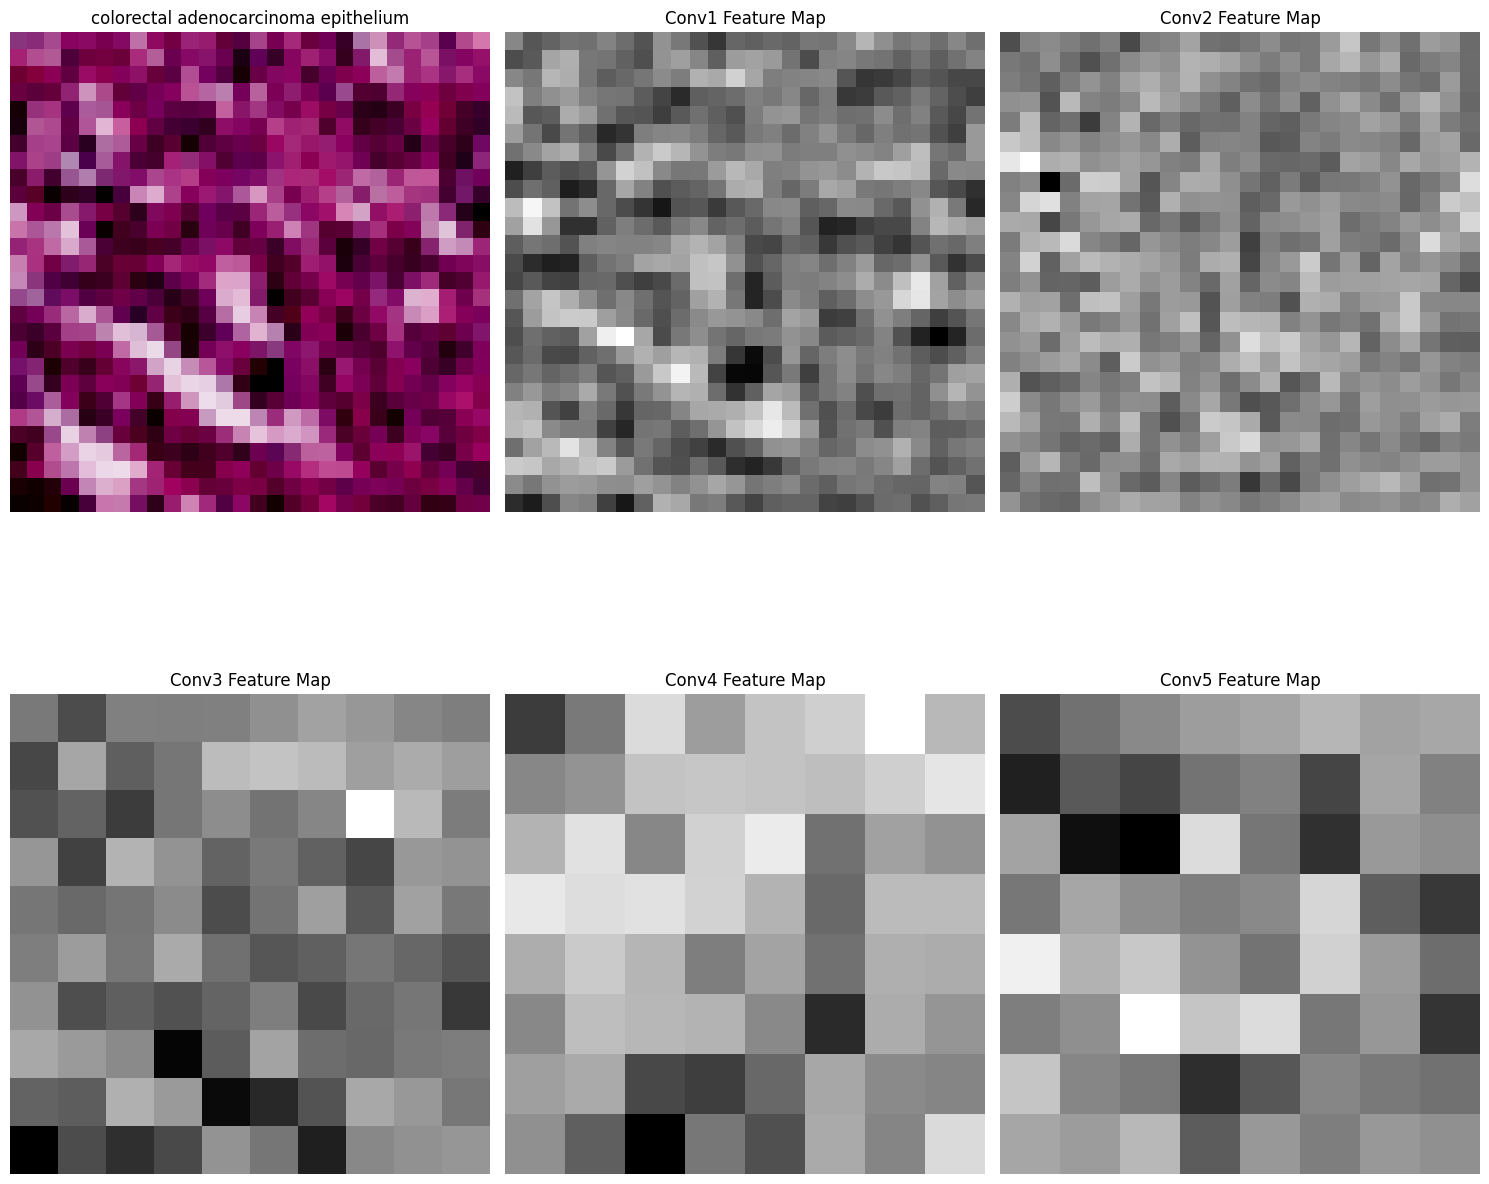

In [14]:
import matplotlib.pyplot as plt
import torch

sample_image_id=3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Get a sample image and its label from test loader
sample_images, sample_labels = next(iter(test_loader))
sample_image = sample_images[sample_image_id].unsqueeze(0).to(device)
sample_label = sample_labels[sample_image_id]

# Create a hook to capture feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Register hooks for all conv layers
hooks = []
conv_layers = []
for module in model.modules():
    if isinstance(module, torch.nn.Conv2d):
        conv_layers.append(module)
        if len(conv_layers) <= 5:  # Get first 5 conv layers
            hooks.append(module.register_forward_hook(get_activation(f'layer{len(conv_layers)}')))

# Move model to same device as input
model = model.to(device)

# Forward pass
_ = model(sample_image)

# Plot the input image and feature maps
plt.figure(figsize=(15, 15))

# Plot input image
plt.subplot(2, 3, 1)
plt.imshow(sample_images[sample_image_id].permute(1, 2, 0))
plt.title(classes[str(sample_label.item())])
plt.axis('off')

# Plot feature maps for each conv layer
for layer_idx in range(5):
    if f'layer{layer_idx+1}' in activation:
        feature_maps = activation[f'layer{layer_idx+1}']
        plt.subplot(2, 3, layer_idx+2)
        # Show first feature map from each conv layer
        plt.imshow(feature_maps[0, 0].cpu().numpy(), cmap='gray')
        plt.title(f'Conv{layer_idx+1} Feature Map')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Remove the hooks
for hook in hooks:
    hook.remove()

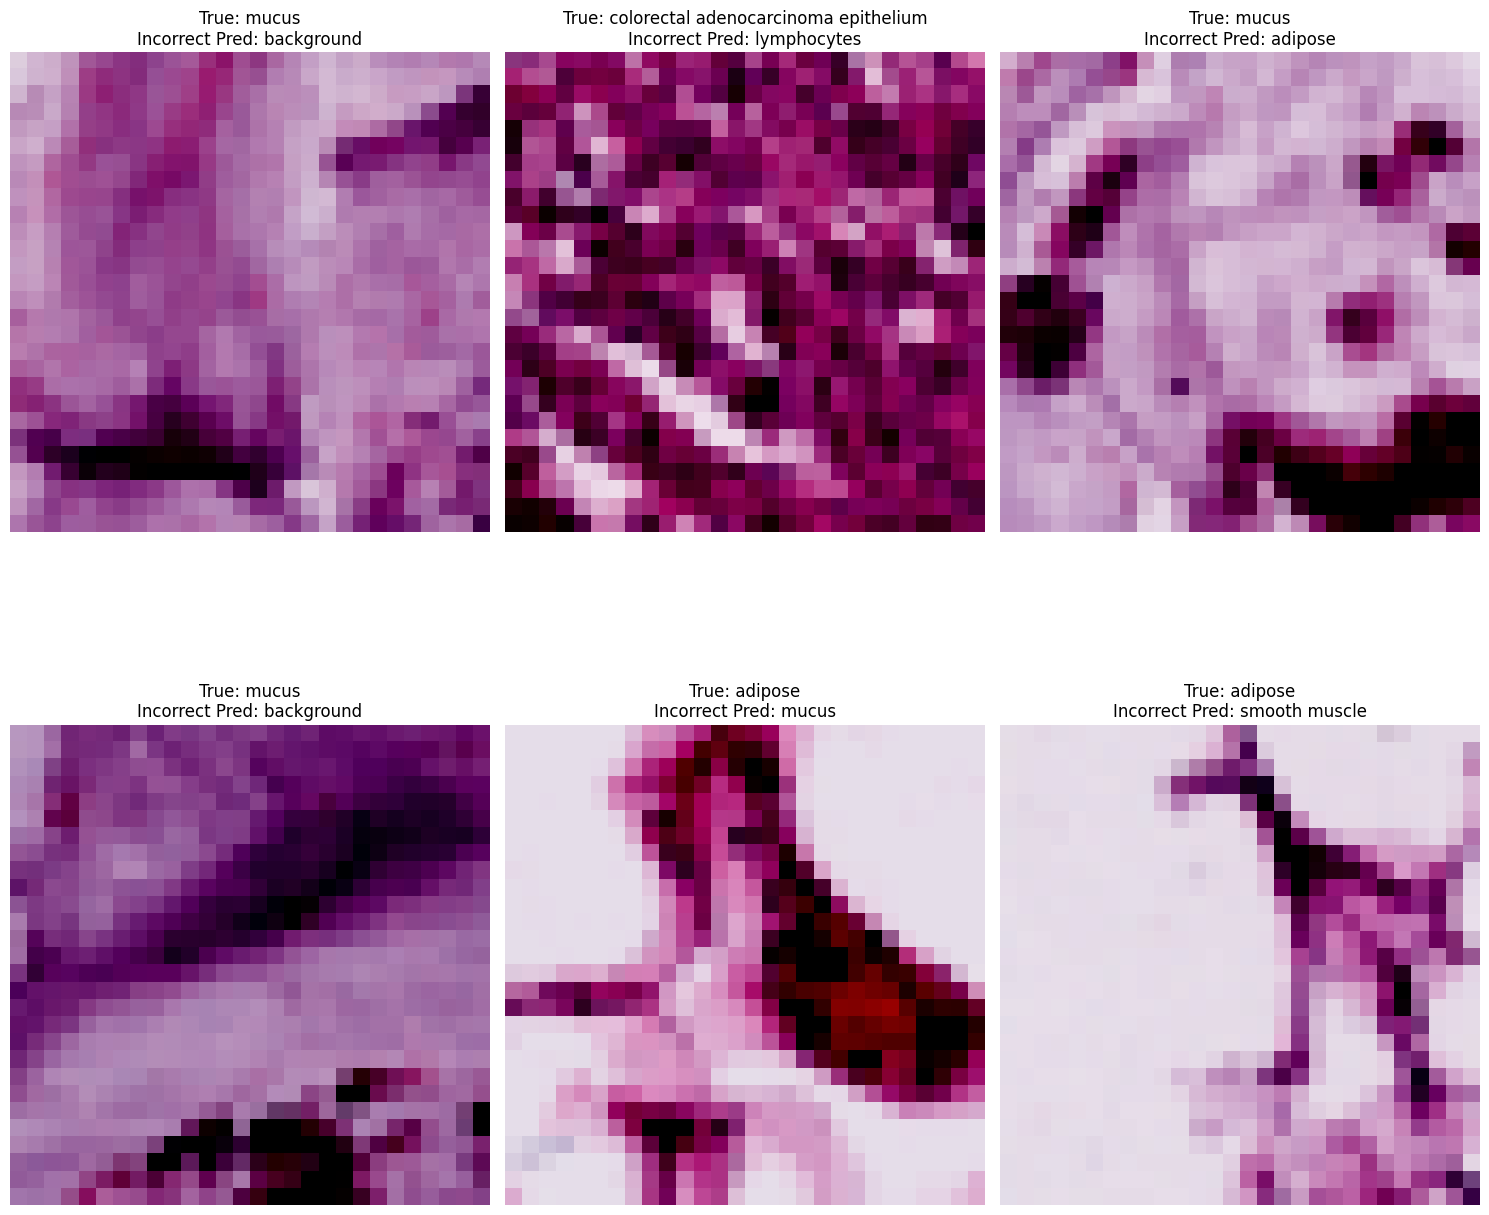

In [15]:
# Get model predictions on test set
model.eval()
all_preds = []
all_labels = []
all_images = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # Convert labels to long type for criterion
        labels = labels.squeeze().long()

        # Store predictions, labels and images
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu())

# Find indices where predictions were wrong
mistake_indices = [i for i in range(len(all_preds)) if all_preds[i] != all_labels[i]]

# Plot up to 6 examples where network made mistakes
num_plots = min(6, len(mistake_indices))
plt.figure(figsize=(15, 15))
for i in range(num_plots):
    idx = mistake_indices[i]
    # Get the corresponding image and true label
    image = all_images[idx]
    label = all_labels[idx]
    pred = all_preds[idx]

    plt.subplot(2, 3, i+1)
    plt.imshow(image.permute(1, 2, 0))  # Properly permute channels for display
    plt.title(f'True: {classes[str(label)]}\nIncorrect Pred: {classes[str(pred)]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### ✏️**Exercise**

In this exercise, you will train a simple CNN model (Net) on the ChestMNIST dataset. ChestMNIST is a large dataset of chest X-ray images that can be used to detect various chest conditions.

The dataset contains chest X-ray images classified into two classes:
- Class 0: Normal - X-rays showing healthy chest anatomy with no abnormalities
- Class 1: Abnormal - X-rays showing various chest conditions like pneumonia, nodules, or other pathologies

The goal is to train a model that can automatically distinguish between normal and abnormal chest X-rays.

1. Load the ChestMNIST dataset from MedMNIST using the provided code:
   ```python
   from medmnist import ChestMNIST
   train_dataset = ChestMNIST(split='train', download=True)
   test_dataset = ChestMNIST(split='test', download=True)
   ```

2. Create DataLoaders for both training and test datasets with appropriate batch sizes

3. Visualize some examples from the dataset:
   - Display a grid of sample images from both normal and abnormal classes (at least 3 examples from each class)
   - Include the class labels in the plot titles
   - Use matplotlib to create a clear visualization

4. Modify the Net model to match ChestMNIST's number of classes (2 classes - normal vs abnormal)

5. Train the model for 5 epochs and print the training loss after every 100 batches

6. Evaluate the model's accuracy on the test set

- **Hint #1:** The images are already in the correct size for our Net model (28x28), just normalize them
- **Hint #2:** Use torch.cuda.is_available() to check if GPU is available and move data to device accordingly
- **Hint #3:** The training loop should look similar to previous exercises, but make sure to handle the binary classification task


In [16]:
from medmnist import ChestMNIST
train_dataset = ChestMNIST(split='train', download=True)
test_dataset = ChestMNIST(split='test', download=True)

100%|██████████| 82.8M/82.8M [00:06<00:00, 12.8MB/s]


Using downloaded and verified file: /root/.medmnist/chestmnist.npz


In [ ]:
data_flag = 'chestmnist'

info = INFO[data_flag]
task = info['task']
n_classes = len(info['label'])

#see github solutions for worked problem

### ✏️**Exercise**

In this exercise, you will train a simple CNN model (Net) on the DermaMNIST dataset. DermaMNIST is a large dataset of dermatoscopic images that can be used to detect various skin conditions.

The dataset contains dermatoscopic images classified into 7 classes:
- Class 0: Actinic keratoses and intraepithelial carcinoma
- Class 1: Basal cell carcinoma
- Class 2: Benign keratosis-like lesions
- Class 3: Dermatofibroma
- Class 4: Melanoma
- Class 5: Melanocytic nevi
- Class 6: Vascular lesions
The goal is to train a model that can automatically classify different types of skin lesions.

1. Load the DermaMNIST dataset from MedMNIST using the provided code:
   ```python
   from medmnist import DermaMNIST
   train_dataset = DermaMNIST(split='train', download=True)
   test_dataset = DermaMNIST(split='test', download=True)
   ```

2. Create DataLoaders for both training and test datasets with appropriate batch sizes

3. Visualize some examples from the dataset:
   - Display a grid of sample images showing examples from different classes
   - Include the class labels in the plot titles
   - Use matplotlib to create a clear visualization

4. Modify the Net model to match DermaMNIST's number of classes (7 classes)

5. Train the model for 5 epochs and print the training loss after every 100 batches

6. Evaluate the model's accuracy on the test set

- **Hint #1:** The images are already in the correct size for our Net model (28x28), just normalize them
- **Hint #2:** Use torch.cuda.is_available() to check if GPU is available and move data to device accordingly
- **Hint #3:** The training loop should look similar to previous exercises, but make sure to handle the multi-class classification task
